Zadanie 1. Znajdź maszynowe epsilon, czyli najmniejszą liczbę a, taką że fl(1 + a) > 1

In [1]:
def find_epsilon():
    a = 1.0
    while 1.0 + a > 1.0:
        a /= 2.0
        
    return 2*a

find_epsilon()

2.220446049250313e-16

Zadanie 2. Rozważamy problem ewaluacji funkcji sin(x), m.in. propagację błędu danych wejściowych, tj. błąd wartości funkcji ze względu na zakłócenie h w
argumencie x<br>
Oceń błąd bezwzględny przy ewaluacji sin(x).<br>
Oceń błąd względny przy ewaluacji sin(x).<br>
Oceń uwarunkowanie dla tego problemu.<br>
Dla jakich wartości argumentu x problem jest bardzo czuły?

In [2]:
from math import sin, cos

def absolute_error(x, e):
    return sin(x) - sin(x*(1+e))

def relative_error(x, e):
    return absolute_error(x, e) / sin(x)

In [3]:
print(absolute_error(1, 0.00002))
print(relative_error(1, 0.00002))

-1.0805877822428478e-05
-1.2841652317810345e-05


In [24]:
def condition(x):
    return abs(x*cos(x)/sin(x))

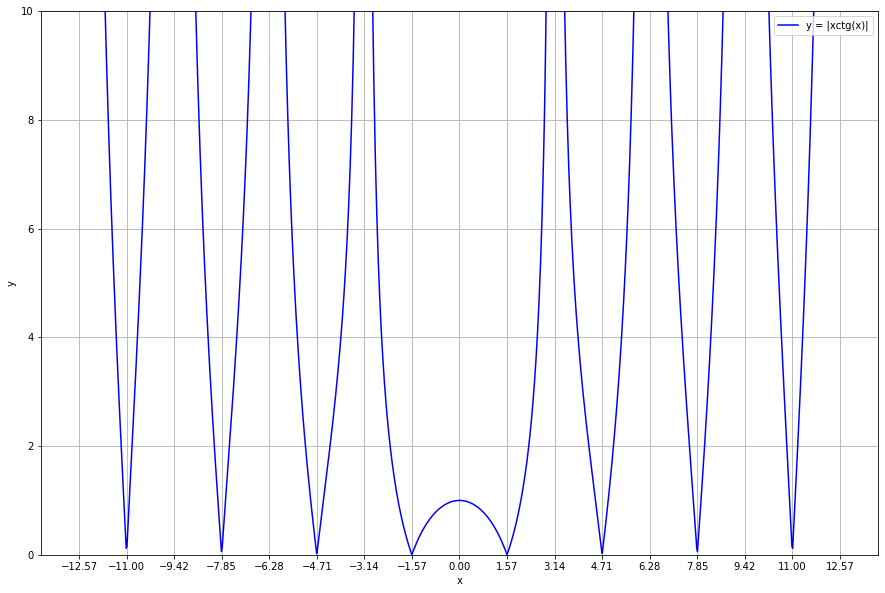

In [25]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
n = 4
x = np.linspace (-n * np.pi , n * np.pi , 1000)
y = np.abs(x * np.cos(x))
y = np.abs(x * (np.cos(x) / np.sin(x)))


fig , ax = plt.subplots(figsize = (15,10))
ax.plot (x , y, color ="blue", label ="y = |xctg(x)|")


ax.set_xlabel ("x")
ax.set_ylabel ("y")
ax.grid(True)

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))

ax.plot()
ax.legend(loc= 1)
ax.set_ylim(0,10)

plt.show ()

In [6]:
from pprint import pprint

Jakie są błędy progresywny (ang. forward error ) i wsteczny (ang. backward
error ) jeśli przybliżamy funkcję sinus biorąc tylko pierwszy człon rozwinięcia,
tj. sin(x) ≈ x, dla x = 0.1, 0.5 i 1.0 ?<br>
Jakie są błędy progresywny i wsteczny jeśli przybliżamy funkcję sinus biorąc pierwsze dwa człony rozwinięcia, tj. sin(x) ≈ x−x
3/6, dla x = 0.1, 0.5 i 1.0 

In [7]:
from math import factorial, sin, asin
    
def my_sin(x, n):
    res = 0
    sign = 1
    for i in range(1, 1+2*n, 2):
        res += sign * x**i / factorial(i)
        sign *= -1
    return res

def calculate_errors(n, x_values):
    
    def forward_error(x):
        return abs(my_sin(x, n) - sin(x))
    
    def backward_error(x):
        return abs(x - asin(my_sin(x, n)))
    
    forward_errors = [forward_error(x) for x in x_values]
    backward_errors = [backward_error(x) for x in x_values]
    
    return forward_errors, backward_errors

In [17]:
calculate_errors(1, [0.1, 0.5, 1.0])

([0.0001665833531718508, 0.020574461395796995, 0.1585290151921035],
 [0.00016742116155979425, 0.023598775598298927, 0.5707963267948966])

In [18]:
calculate_errors(2, [0.1, 0.5, 1.0])

([8.331349481138783e-08, 0.0002588719375363202, 0.008137651474563135],
 [8.373180472587283e-08, 0.0002949592406357171, 0.01488921666225429])

In [21]:
def calculate_errors_table(n, x_values, accuracy = 8):
    forward, backward = calculate_errors(n, x_values)
    res = ["x, sin(x), computed sin, forward, arcsin(computed sin), backward"]
    
    for i in range(len(x_values)):
        x = x_values[i]
        tmp = [x, sin(x), my_sin(x, n), forward[i], asin(my_sin(x, n)), backward[i]]
        res.append([round(a, accuracy) for a in tmp])
    return res
        

In [22]:
pprint(calculate_errors_table(1, [0.1, 0.5, 1.0]))

['x, sin(x), computed sin, forward, arcsin(computed sin), backward',
 [0.1, 0.09983342, 0.1, 0.00016658, 0.10016742, 0.00016742],
 [0.5, 0.47942554, 0.5, 0.02057446, 0.52359878, 0.02359878],
 [1.0, 0.84147098, 1.0, 0.15852902, 1.57079633, 0.57079633]]


In [23]:
pprint(calculate_errors_table(2, [0.1, 0.5, 1.0]))

['x, sin(x), computed sin, forward, arcsin(computed sin), backward',
 [0.1, 0.09983342, 0.09983333, 8e-08, 0.09999992, 8e-08],
 [0.5, 0.47942554, 0.47916667, 0.00025887, 0.49970504, 0.00029496],
 [1.0, 0.84147098, 0.83333333, 0.00813765, 0.98511078, 0.01488922]]
